In [2]:
import pandas as pd
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import re
import pickle

import octis
from octis.optimization.optimizer import Optimizer
from skopt.space.space import Real, Categorical, Integer
from octis.models.CTM import CTM
from octis.dataset.dataset import Dataset
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence

d:\MHA\Topic Modeling Project\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = Dataset()
dataset.load_custom_dataset_from_folder("content/corpus")

In [4]:
cv = Coherence(texts=dataset.get_corpus(), measure='c_v')
uci = Coherence(texts=dataset.get_corpus(), measure='c_uci')
npmi = Coherence(texts=dataset.get_corpus())
topic_diversity = TopicDiversity(topk=10)

In [6]:
out = []
for i in range(5,51):
    print(i)
    model = CTM(num_topics=i,num_epochs=50,use_partitions=False,inference_type="combined" ,bert_model='all-mpnet-base-v2', bert_path='content/bert_path/all-mpnet-base-v2/_allmpnet')
    output = model.train_model(dataset)
    out.append(output)

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [7]:
with open('content/best_k_comb.pkl', 'wb') as file:
    pickle.dump(out, file)

In [8]:
with open('content/best_k_comb.pkl', 'rb') as file:
    out = pickle.load(file)

In [9]:
cv_list = []
uci_list = []
npmi_list = []
td_list = []
for i,j in enumerate(out):
    topic_diversity_score = topic_diversity.score(j)
    cv_score = cv.score(j)
    npmi_score = npmi.score(j)
    uci_score = uci.score(j)

    td_list.append(topic_diversity_score)
    cv_list.append(cv_score)
    uci_list.append(uci_score)
    npmi_list.append(npmi_score)

In [10]:
topic = [len(x['topics']) for x in out]

Text(0.5, 1.0, 'Topic Diversity Scores for Different Numbers of Topics')

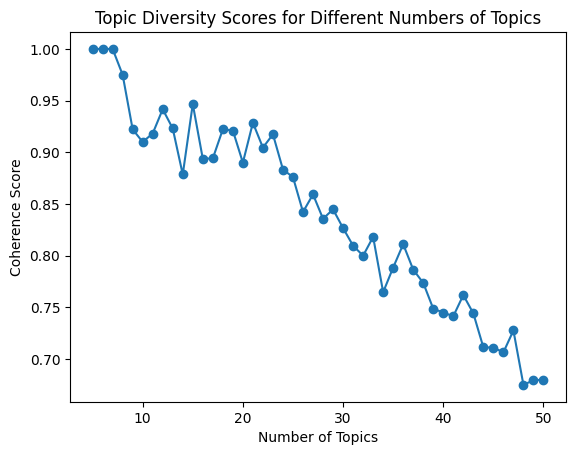

In [12]:
# Plotting the coherence scores
plt.plot(topic, td_list, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Topic Diversity Scores for Different Numbers of Topics')

In [ ]:
for i,j in enumerate(out):
    topic_diversity_score = topic_diversity.score(j)
    cv_score = cv.score(j)
    npmi_score = npmi.score(j)
    uci_score = uci.score(j)
    print(f'topic {i+5}:')
    print("Topic diversity  : "+str(topic_diversity_score))
    print("NPMI             : "+str(npmi_score))
    print("CV               : "+str(cv_score))
    print("UCI              : "+str(uci_score)+'\n')